<a href="https://colab.research.google.com/github/IshantWadhwa4/Machine_Learning/blob/master/Supervisedlearning/Randomforest/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

## Step 1: Get Data

In [0]:
import pandas as pd

In [0]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv") 

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## step2: Data cleaning

In [0]:
# embark has only 2 missing values so simply we can take the mode it is a clagorcila 
titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [0]:
# Age lets see the age distribution of data
import seaborn as sns


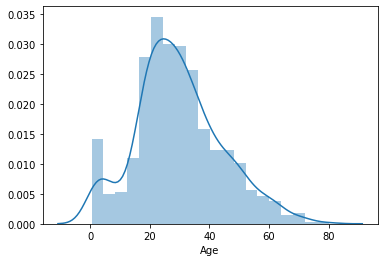

In [11]:
sns.distplot(titanic_data.Age)

In [0]:
# we can see age is almost normal distributed so we can take median or mean to fill na
titanic_data.Age.fillna(titanic_data.Age.median(),inplace=True)

In [0]:
# cabin has more than 60% null values we can simply drop that collumn
titanic_data.drop('Cabin',axis=1,inplace=True)

In [16]:
titanic_data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [0]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)
titanic_data = pd.get_dummies(titanic_data, columns=['GenderClass','Embarked'], drop_first=True)

In [88]:
titanic = titanic_data.drop(['Name','Ticket','Sex','SibSp','Parch','PassengerId'], axis = 1)
titanic.head()

,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,0,1,0,1
1,1,1,38.0,71.2833,2,1,0,0,0
2,1,3,26.0,7.9250,1,1,0,0,1
3,1,1,35.0,53.1000,2,1,0,0,1
4,0,3,35.0,8.0500,1,0,1,0,1


## Step 3: EDA

## Step 4: RandomForest

In [0]:
# Split data in X And y
y = titanic['Survived']
X = titanic.drop('Survived',axis=1)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 1)

In [91]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(712, 8) (179, 8) (712,) (179,)


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
randomForest = RandomForestClassifier(random_state=1) # base model


In [0]:
rf = randomForest.fit(X_train,y_train) 

In [0]:
yPredict = rf.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score 

In [149]:
accuracy_score(y_test,yPredict)

0.770949720670391

In [0]:
from sklearn.metrics import confusion_matrix 

In [150]:
confusion_matrix(y_test,yPredict)

array([[93, 13],
       [28, 45]])

### gridSearch for Random Forest

In [0]:
import warnings
warnings.filterwarnings("ignore")


In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
parameters = {
    'criterion':['gini','entropy'],'max_depth':range(5,20),'max_leaf_nodes':range(20,71,5),
    "min_samples_split":range(2,11),"min_samples_leaf":range(2,11),"bootstrap":[True,False],"n_estimators":[100,200,300,500,1000],"max_features":['sqrt','log2',None]
    }

In [0]:
 gd = GridSearchCV(RandomForestClassifier(random_state=1),param_grid=parameters,cv=10)

In [157]:
gd.fit(X_train,y_train)

KeyboardInterrupt: ignored

In [143]:
gd.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'max_leaf_nodes': 20}

In [0]:
gdpred = gd.predict(X_test)

In [138]:
accuracy_score(y_test,gdpred)

0.776536312849162

In [139]:
confusion_matrix(y_test,gdpred)

array([[100,   6],
       [ 34,  39]])

## Titanic Kaggle data

In [0]:
titanic_data = pd.read_csv('train.csv')

In [0]:
titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0],inplace=True)
titanic_data.Age.fillna(titanic_data.Age.median(),inplace=True)
titanic_data.drop('Cabin',axis=1,inplace=True)
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)
titanic_data = pd.get_dummies(titanic_data, columns=['GenderClass','Embarked'], drop_first=True)
titanic = titanic_data.drop(['Name','Ticket','Sex','SibSp','Parch','PassengerId'], axis = 1)

In [62]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived              891 non-null int64
Pclass                891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
FamilySize            891 non-null int64
GenderClass_female    891 non-null uint8
GenderClass_male      891 non-null uint8
Embarked_Q            891 non-null uint8
Embarked_S            891 non-null uint8
dtypes: float64(2), int64(3), uint8(4)
memory usage: 38.4 KB


In [0]:
y = titanic['Survived']
X = titanic.drop('Survived',axis=1)

In [0]:
decisionTree3 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=15,random_state=1,max_leaf_nodes=50)
dt = decisionTree3.fit(X,y) 

In [0]:
test = pd.read_csv('test.csv')

In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [0]:
test.Fare.fillna(test['Fare'].median(),inplace=True)
test.Age.fillna(test.Age.median(),inplace=True)
test.drop('Cabin',axis=1,inplace=True)
test['FamilySize'] = test['SibSp'] + test['Parch']+1
test['GenderClass'] = test.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)
test = pd.get_dummies(test, columns=['GenderClass','Embarked'], drop_first=True)
titanic_test = test.drop(['Name','Ticket','Sex','SibSp','Parch','PassengerId'], axis = 1)

In [74]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass                418 non-null int64
Age                   418 non-null float64
Fare                  418 non-null float64
FamilySize            418 non-null int64
GenderClass_female    418 non-null uint8
GenderClass_male      418 non-null uint8
Embarked_Q            418 non-null uint8
Embarked_S            418 non-null uint8
dtypes: float64(2), int64(2), uint8(4)
memory usage: 14.8 KB


In [0]:
yPred = dt.predict(titanic_test)

In [0]:
result_dict = { 'PassengerId':test['PassengerId'],'Survived':yPred}
result = pd.DataFrame(result_dict)

In [80]:
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [0]:
result.to_csv('result.csv',index=False)